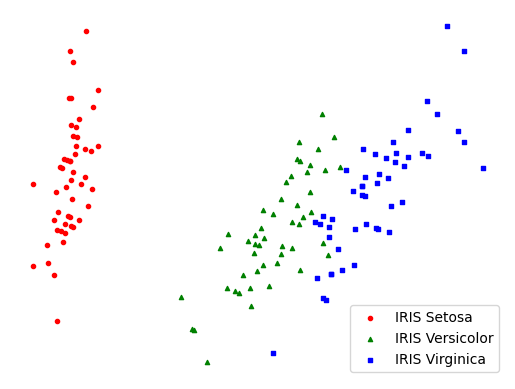

In [13]:
import pandas as pd 
from sklearn.decomposition import PCA as sklearnPCA 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
 
# import some data to play with 
iris = datasets.load_iris() 
X = iris.data[:, :4]  # we take full 4 features 
Y = iris.target 
C = 3 # number of classes (for c = 0, 1, 2)
# Normalize data 
X_norm = (X - X.min())/(X.max() - X.min()) 
 
pca = sklearnPCA(n_components=2) #2-dimensional PCA 
transformed = pd.DataFrame(pca.fit_transform(X_norm)) 
 
plt.axis("off") 
 
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa', c='red') 
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor', c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica', c='blue', marker="s") 
plt.legend() 
plt.show() 

In [2]:
from scipy import sparse  
def convert_labels(y, C = C): 
    """ 
    convert 1d label to a matrix label: each column of this  
    matrix coresponding to 1 element in y. In i-th column of Y,  
    only one non-zeros element located in the y[i]-th position,  
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return 
 
            [[1, 0, 0, 1], 
             [0, 0, 1, 0], 
             [0, 1, 0, 0]] 
    """ 
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray() 
    return Y  
 
# Y = convert_labels(y, C) 

Chương trình tự xây dựng các hàm/phương thức từ thư viện cơ bản (bài tập tự thực hành 1)

In [3]:
def softmax_stable(Z): 
    """
     Compute softmax values for each sets of scores in Z. 
    each column of Z is a set of score.     
    """ 
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True)) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
def softmax(Z): 
    """ 
    #Compute softmax values for each sets of scores in V. 
    #each column of V is a set of score.     
    """ 
    e_Z = np.exp(Z) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000): 
    W = [W_init]     
    C = W_init.shape[1] 
    Y = convert_labels(y, C) 
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 
     
    count = 0 
    check_w_after = 20 
    while count < max_count: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(C, 1) 
            ai = softmax(np.dot(W[-1].T, xi)) 
            W_new = W[-1] + eta*xi.dot((yi - ai).T) 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(W_new - W[-check_w_after]) < tol: 
                    return W 
            W.append(W_new) 
    return W 
 
# cost or loss function   
def cost(X, Y, W): 
    A = softmax(W.T.dot(X)) 
    return -np.sum(Y*np.log(A)) 
 
# Predict that X belong to which class (1..C now indexed as 0..C-1 )  
def pred(W, X): 
    """ 
    predict output of each columns of X 
    Class of each x_i is determined by location of max probability 
    Note that class are indexed by [0, 1, 2, ...., C-1] 
    """ 
    A = softmax_stable(W.T.dot(X)) 
    return np.argmax(A, axis = 0) 
 
# W[-1] is the solution, W is all history of weights

In ra kết quả(bộ hệ số w)

In [11]:
print(X.shape)
print(Y.shape)
# print(X)
eta = .05  
d = X.T.shape[0] 
W_init = np.random.randn(X.T.shape[0], C) 
W = softmax_regression(X.T, Y.T, W_init, eta) 
print(W[-1]) 

(150, 4)
(150,)
[[ 1.59069403  1.94546077 -4.04474818]
 [ 4.11550112  0.04863651 -5.75631828]
 [-6.70430564 -1.82672308  5.59778042]
 [-3.10126183 -5.97399392  3.8756177 ]]


In [5]:
import sklearn 
# Splitting Train and test Data 
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2, random_state=2) 
# Applying logistic sigmoid regression to find coefficients
w_init = np.random.randn(X_train.T.shape[0], C)
eta = 0.05
w = softmax_regression(X_train.T, Y_train.T, w_init, eta)

# Print coefficients
print("Coefficients:")
print(w[-1])

Y_predict = pred(w[-1], X_test.T)
print(Y_predict)

# for accuracy 
from sklearn.metrics import accuracy_score 
print("Accuracy Score: ")
print(accuracy_score(Y_test,Y_predict)) 
 
# for confusion matrix 
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(Y_test,Y_predict) 
print("Confusion Matrix:")
print(cm) 

Coefficients:
[[ 3.27045706  2.3789026  -3.27299329]
 [ 2.67117234  0.24649459 -5.0177018 ]
 [-6.41979644 -1.46484981  5.65644604]
 [-2.83774862 -4.29981967  5.80546911]]
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2]
Accuracy Score: 
1.0
Confusion Matrix:
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
#from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris 
iris=load_iris() 
# print(iris) 
X=iris.data # Observed variable  
Y=iris.target # Dependent variable (label) 
#print(X.shape) 
#print(Y.shape) 
 
# Splitting Train and test Data 
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,  random_state=2) 
#sc=StandardScaler() 
#X_train=sc.fit_transform(X_train) 
#X_test=sc.transform(X_test) 
 
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient 
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000) 
# and train model by Training Dataset 
lorg.fit(X_train,Y_train)  
 
# Then Predict the Test data 
Y_pred=lorg.predict(X_test) 
 
# for accuracy 
from sklearn.metrics import accuracy_score 
print("Accuracy Score: ")
print(accuracy_score(Y_test,Y_pred)) 
 
# for confusion matrix 
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(Y_test,Y_pred) 
print("Confusion Matrix:")
print(cm) 
print("Coefficients:")
print(lorg.coef_)
y_predict = lorg.predict(X_test)
print("Predict:")
print(y_predict)

Accuracy Score: 
0.9666666666666667
Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Coefficients:
[[-0.1329301   1.08437662 -2.31435839 -0.99544585]
 [ 0.3329466  -0.38552373 -0.1219346  -0.9290821 ]
 [-0.2000165  -0.69885289  2.43629299  1.92452795]]
Predict:
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


Accuracy Score:  0.9666666666666667
Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Coefficients:
[[-2.66279622  1.00561443]
 [-0.32597968  0.23882952]
 [ 2.9887759  -1.24444396]]
Predict:
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


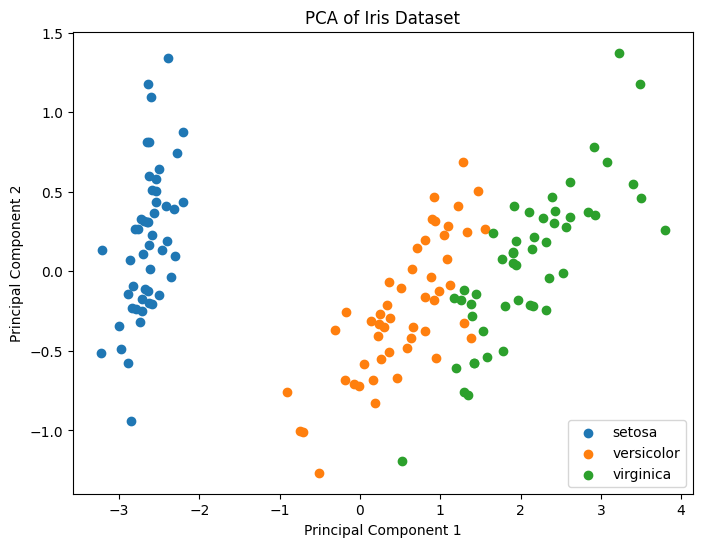

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA  # Import PCA
iris = load_iris() 
X = iris.data # Observed variable  
Y = iris.target # Dependent variable (label)

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Splitting Train and test Data 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_pca, Y, test_size=0.2, random_state=2)

# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient 
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)

# Train the model using the training dataset
lorg.fit(X_train, Y_train)  

# Then Predict the Test data 
Y_pred = lorg.predict(X_test) 

# Calculate accuracy 
from sklearn.metrics import accuracy_score 
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))

# Calculate confusion matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 
print("Confusion Matrix:")
print(cm) 

# Print coefficients
print("Coefficients:")
print(lorg.coef_)

# Predictions
y_predict = lorg.predict(X_test)
print("Predict:")
print(y_predict)

# Plot the data after dimensionality reduction
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(X_pca[Y == i][:, 0], X_pca[Y == i][:, 1], label=iris.target_names[i])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
